<a href="https://colab.research.google.com/github/eyadXE/population-prediction-model-/blob/main/Population%20prediction%20model%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

#linear regression model


##read before looking into the code (description of the model )

###this model is designed by linear regression algorthim (least square rule) to predict the population number (y) by giving the model the year number (x) of eqypt then optimized by the gradient descent to get min error


##importing data


In [ ]:
data =pd.read_csv("/content/countries.csv")# how to read data set

In [ ]:
data

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


##extracting the US,China,Egypt

Text(0, 0.5, 'years')

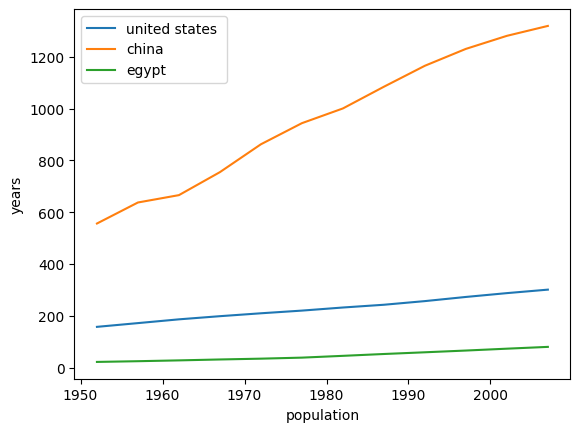

In [ ]:

us = data[data.country=="United States"]# isolate the data from the data set
china=data[data.country=="China"]
egypt=data[data.country=="Egypt"]
plt.plot(us.year,us.population/10**6)
plt.plot(china.year,china.population/10**6)
plt.plot(egypt.year,egypt.population/10**6)#
#10**becouse th enumber is so big and it's repreasented on the graph by millions
plt.legend(['united states ','china','egypt'])
plt.xlabel("population")
plt.ylabel("years")

##representing data by bargraph chart


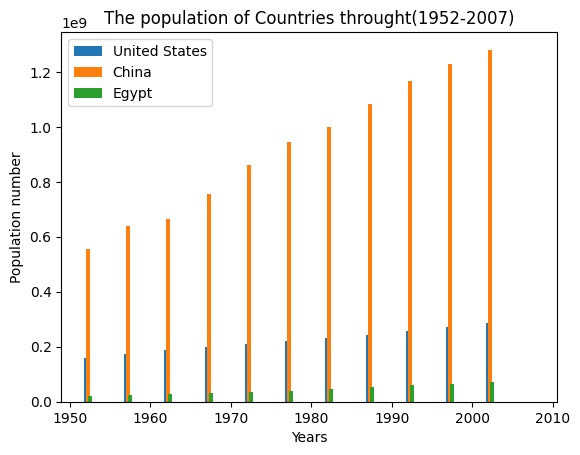

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have defined the data for each country correctly

# Example data
us_data = [157553000, 171984000, 186538000, 198712000, 209896000, 220239000, 232187835, 242803533, 256894189, 272911760,287675526, 301139947/10**6]  # Example data for the United States
china_data = [556263527, 637408000, 665770000, 754550000, 862030000,943455000, 1000281000, 1084035000, 1164970000, 1230075000,1280400000, 1318683096/10**6]
egypt_data = [22223309,25009741,28173309,31681188,34807417,38783863,45681811,52799062,59402198,66134291,73312559,80264543/10**6]

years = [1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007]


# Plotting
plt.bar(years, us_data, width=0.5, align='center', label='United States')
plt.bar([year + 0.25 for year in years], china_data, width=0.5, align='center', label='China')
plt.bar([year + 0.5 for year in years], egypt_data, width=0.5, align='center', label='Egypt')

plt.xlabel("Years")
plt.ylabel("Population number")
plt.title("The population of Countries throught(1952-2007)")
plt.legend()
plt.show()

##the least square algorthim

In [ ]:
import numpy as np

def prediction_pop_model(year, population, pred_year):

    n = len(year)
    sum_x = np.sum(year, dtype=np.float64)
    sum_y = np.sum(population, dtype=np.float64)
    sum_xy = np.sum(year * population, dtype=np.float64)
    sum_x_squared = np.sum(year ** 2, dtype=np.float64)

    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    intercept = (sum_y - slope * sum_x) / n

    pred_population = slope * (pred_year) + intercept #y=mx+c
    return pred_population


year = np.array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007], dtype=np.float64)
population = np.array([22223309, 25009741, 28173309, 31681188, 34807417, 38783863, 45681811, 52799062, 59402198, 66134291, 73312559, 80264543], dtype=np.float64)

pred_year = 2007
pred_population = prediction_pop_model(year, population, pred_year)

print("Predicted Population for 2007:", pred_population)
print("actual population in 2007 =80264543 ")
# actual data is 97 million

Predicted Population for 2007: 76107077.0
actual population in 2007 =80264543 


##graph between the actual and the prediction


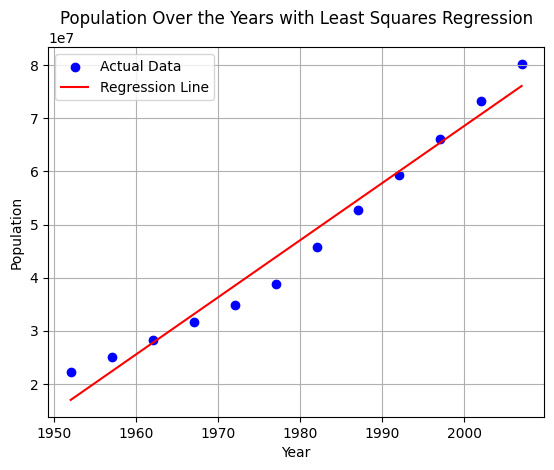

In [ ]:
year = np.array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007], dtype=np.float64)
population = np.array([22223309, 25009741, 28173309, 31681188, 34807417, 38783863, 45681811, 52799062, 59402198, 66134291, 73312559, 80264543], dtype=np.float64)
plt.scatter(year, population, color='blue', label='Actual Data')
plt.plot(year, prediction_pop_model(year, population, year), color='red', label='Regression Line')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over the Years with Least Squares Regression')
plt.legend()
plt.grid(True)
plt.show()

## gradient descent algorthim





The cost function is given by:
\begin{equation}
\text{cost} =\frac{1}{2} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}
###note:
$$
 \hat{y}_i = m\hat{x}_i + b
$$
\
$$
\hat{y}_i = predicted population
$$
$$
{y}_i = actual population
$$
The partial derivative of the cost function with respect to \( m \) is:
\begin{equation}
\frac{\partial \text{cost}}{\partial m} = \frac{2}{2} \sum_{i=1}^n (y_i - (mx_i + b))(-x_i)
\end{equation}
\begin{equation}
= \sum_{i=1}^n -x_i (y_i - (mx_i + b))
\end{equation}

The partial derivative of the cost function with respect to \( b \) is:
\begin{equation}
\frac{\partial \text{cost}}{\partial b} = \frac{2}{2} \sum_{i=1}^n (y_i - (mx_i + b))(-1)
\end{equation}
\begin{equation}
= \sum_{i=1}^n - (y_i - (mx_i + b))
\end{equation}



this is the slope and the intercept before grad = -2083009127.3363638 , 1075792.8272727274
this is the slope and the intercept after grad = 1075792.8272727274 , -2083009127.3363638


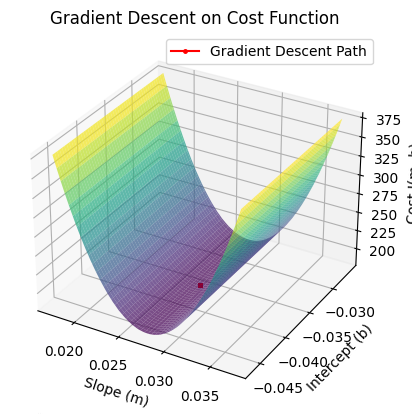

this after grad pred= 70728112.8636365
this before grad pred 70728112.8636365
the actual of population in 2002 = 73312559 


In [ ]:

year = np.array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007], dtype=np.float64)
population = np.array([22223309, 25009741, 28173309, 31681188, 34807417, 38783863, 45681811, 52799062, 59402198, 66134291, 73312559, 80264543], dtype=np.float64)
#dtype=np.float increase the range that var can handle

import numpy as np

def prediction_pop_model(year, population, pred_year):

    n = len(year)# x=years
    sum_x = np.sum(year, dtype=np.float64)# sum of X
    sum_y = np.sum(population, dtype=np.float64)# sum of Y
    sum_xy = np.sum(year * population, dtype=np.float64)# sum of x*y
    sum_x_squared = np.sum(year ** 2, dtype=np.float64)# sumof the x squared

    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    intercept = (sum_y - slope * sum_x) / n

    pred_population = slope * (pred_year) + intercept #y=mx+c
    return pred_population,slope,intercept


year = np.array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007], dtype=np.float64)
population= np.array([22223309, 25009741, 28173309, 31681188, 34807417, 38783863, 45681811, 52799062, 59402198, 66134291, 73312559, 80264543], dtype=np.float64)

pred_year = 2007
pred_population,c,z = prediction_pop_model(year, population, pred_year)


print( "this is the slope and the intercept before grad =",z,",",c)




def gradient_descent_algorithm(m_now, b_now, population, year, learning_rate):
    n = len(year)
    y_pred = m_now * year + b_now
    #partial dervative
    m_grad = -np.sum(year * (population - y_pred))
    b_grad = -np.sum(population - y_pred)
    #updating m and b after each iteration
    m = m_now - learning_rate * m_grad
    b = b_now - learning_rate * b_grad
    return m, b
m=c
b=z
l=0.00000001
iter=100
# Track cost for each iteration
cost_history = []
m_history = []
b_history = []





for i in range(iter):
  m,b=gradient_descent_algorithm(m,b,population,year,l)
  cost = cost_function(m, b, year, population)
  cost_history.append(cost)
  m_history.append(m)
  b_history.append(b)


print("this is the slope and the intercept after grad =",m,",",b)

##################################################################################
# Create a mesh grid for plotting the cost function as a surface
M = np.linspace(min(m_history) - 0.01, max(m_history) + 0.01, 100)
B = np.linspace(min(b_history) - 0.01, max(b_history) + 0.01, 100)
M, B = np.meshgrid(M, B)
Z = np.array([[cost_function(m, b, year, population) for m in M[0]] for b in B[:, 0]])

# Plot the cost function as a surface and the gradient descent path
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Z, cmap='viridis', alpha=0.7)
ax.plot(m_history, b_history, cost_history, 'r.-', markersize=5, label='Gradient Descent Path')

ax.set_xlabel('Slope (m)')
ax.set_ylabel('Intercept (b)')
ax.set_zlabel('Cost J(m, b)')
ax.set_title('Gradient Descent on Cost Function')
plt.legend()
plt.show()
##################################################################################### generated by AI for more understanding


yearss=2002   #                                             <------------            the value we are predicting is the population of this year
f=m*yearss+b

y=c*yearss+z
print("this after grad pred=",y)
print("this before grad pred",f)
print("the actual of population in 2002 = 73312559 ")


####the result is
the year =2002\
the predction = 70 million\
the actual = 73 million

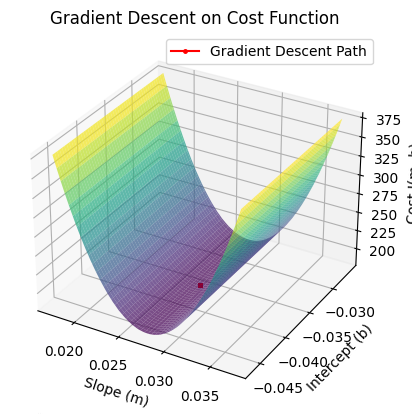

In [ ]:
######generated by AI for more understanding

# Create a mesh grid for plotting the cost function as a surface
M = np.linspace(min(m_history) - 0.01, max(m_history) + 0.01, 100)
B = np.linspace(min(b_history) - 0.01, max(b_history) + 0.01, 100)
M, B = np.meshgrid(M, B)
Z = np.array([[cost_function(m, b, year, population) for m in M[0]] for b in B[:, 0]])

# Plot the cost function as a surface and the gradient descent path
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Z, cmap='viridis', alpha=0.7)
ax.plot(m_history, b_history, cost_history, 'r.-', markersize=5, label='Gradient Descent Path')

ax.set_xlabel('Slope (m)')
ax.set_ylabel('Intercept (b)')
ax.set_zlabel('Cost J(m, b)')
ax.set_title('Gradient Descent on Cost Function')
plt.legend()
plt.show()

##real world predictions

In [ ]:
import numpy as np

def prediction_pop_model(year, population, pred_year):

    n = len(year)
    sum_x = np.sum(year, dtype=np.float64)
    sum_y = np.sum(population, dtype=np.float64)
    sum_xy = np.sum(year * population, dtype=np.float64)
    sum_x_squared = np.sum(year ** 2, dtype=np.float64)

    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    intercept = (sum_y - slope * sum_x) / n

    pred_population = slope * (pred_year) + intercept #y=mx+c
    return pred_population


year = np.array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007,2009,2011,2013,2015,2017,2019,2021,2023,2024], dtype=np.float64)
population = np.array([22223309, 25009741, 28173309, 31681188, 34807417, 38783863, 45681811, 52799062, 59402198, 66134291, 73312559, 75100000,78300000,81500000,85800000,89000000,94800000,98900000,102800000,106100000,107300000], dtype=np.float64)

pred_year = 2024
pred_population = prediction_pop_model(year, population, pred_year)

print("Predicted Population for 2024:", pred_population)
print("actual population in 2024 =107300000 ")


Predicted Population for 2024: 101114686.20635796
actual population in 2024 =107300000 


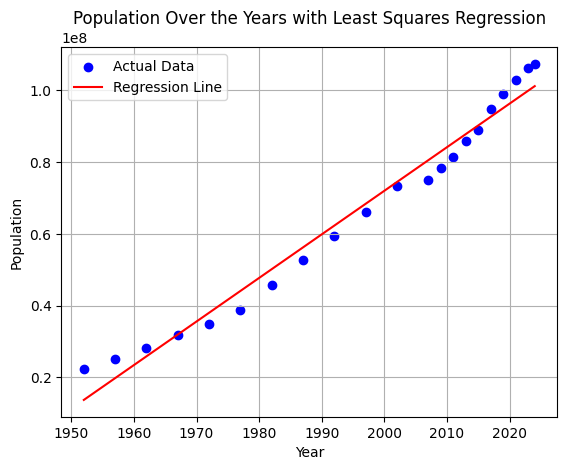

In [ ]:
year = np.array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007,2009,2011,2013,2015,2017,2019,2021,2023,2024], dtype=np.float64)
population = np.array([22223309, 25009741, 28173309, 31681188, 34807417, 38783863, 45681811, 52799062, 59402198, 66134291, 73312559, 75100000,78300000,81500000,85800000,89000000,94800000,98900000,102800000,106100000,107300000], dtype=np.float64)

plt.scatter(year, population, color='blue', label='Actual Data')
plt.plot(year, prediction_pop_model(year, population, year), color='red', label='Regression Line')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over the Years with Least Squares Regression')
plt.legend()
plt.grid(True)
plt.show()

this is the slope and the intercept before grad = -2355438017.0762997 , 1213711.8099222616
this is the slope and the intercept after grad = 1213711.8099222616 , -2355438017.0762997


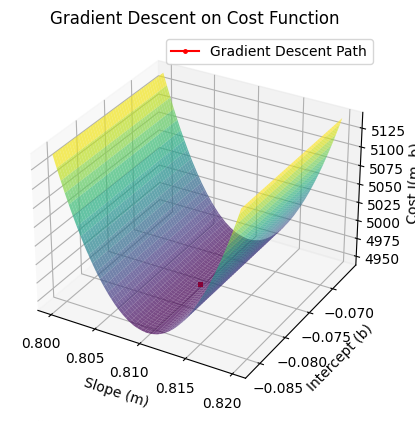

this after grad pred= 101114686.20635796
this before grad pred 101114686.20635796
the actual of population in 2024 = 107300000 


In [ ]:

def cost_function(m, b, year, population):
    n = len(year)
    predictions = m * year + b
    cost = (1 / (2 * n)) * np.sum((population - predictions) ** 2)
    return cost
year = np.array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007,2009,2011,2013,2015,2017,2019,2021,2023,2024], dtype=np.float64)
population = np.array([22223309, 25009741, 28173309, 31681188, 34807417, 38783863, 45681811, 52799062, 59402198, 66134291, 73312559, 75100000,78300000,81500000,85800000,89000000,94800000,98900000,102800000,106100000,107300000], dtype=np.float64)

import numpy as np

def prediction_pop_model(year, population, pred_year):

    n = len(year)# x=years
    sum_x = np.sum(year, dtype=np.float64)# sum of X
    sum_y = np.sum(population, dtype=np.float64)# sum of Y
    sum_xy = np.sum(year * population, dtype=np.float64)# sum of x*y
    sum_x_squared = np.sum(year ** 2, dtype=np.float64)# sumof the x squared

    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    intercept = (sum_y - slope * sum_x) / n

    pred_population = slope * (pred_year) + intercept #y=mx+c
    return pred_population,slope,intercept


year = np.array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007,2009,2011,2013,2015,2017,2019,2021,2023,2024], dtype=np.float64)
population = np.array([22223309, 25009741, 28173309, 31681188, 34807417, 38783863, 45681811, 52799062, 59402198, 66134291, 73312559, 75100000,78300000,81500000,85800000,89000000,94800000,98900000,102800000,106100000,107300000], dtype=np.float64)

pred_year = 2007
pred_population,c,z = prediction_pop_model(year, population, pred_year)


print( "this is the slope and the intercept before grad =",z,",",c)




def gradient_descent_algorithm(m_now, b_now, population, year, learning_rate):
    n = len(year)
    y_pred = m_now * year + b_now
    #partial dervative
    m_grad = -np.sum(year * (population - y_pred))
    b_grad = -np.sum(population - y_pred)
    #updating m and b after each iteration
    m = m_now - learning_rate * m_grad
    b = b_now - learning_rate * b_grad
    return m, b
m=c
b=z
l=0.00000001
iter=100
# Track cost for each iteration
cost_history = []
m_history = []
b_history = []





for i in range(iter):
  m,b=gradient_descent_algorithm(m,b,population,year,l)
  cost = cost_function(m, b, year, population)
  cost_history.append(cost)
  m_history.append(m)
  b_history.append(b)


print("this is the slope and the intercept after grad =",m,",",b)

##################################################################################
# Create a mesh grid for plotting the cost function as a surface
M = np.linspace(min(m_history) - 0.01, max(m_history) + 0.01, 100)
B = np.linspace(min(b_history) - 0.01, max(b_history) + 0.01, 100)
M, B = np.meshgrid(M, B)
Z = np.array([[cost_function(m, b, year, population) for m in M[0]] for b in B[:, 0]])

# Plot the cost function as a surface and the gradient descent path
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Z, cmap='viridis', alpha=0.7)
ax.plot(m_history, b_history, cost_history, 'r.-', markersize=5, label='Gradient Descent Path')

ax.set_xlabel('Slope (m)')
ax.set_ylabel('Intercept (b)')
ax.set_zlabel('Cost J(m, b)')
ax.set_title('Gradient Descent on Cost Function')
plt.legend()
plt.show()
##################################################################################### generated by AI for more understanding


yearss=2024   #                                             <------------            the value we are predicting is the population of this year
f=m*yearss+b

y=c*yearss+z
print("this after grad pred=",y)
print("this before grad pred",f)
print("the actual of population in 2024 = 107300000 ")


####the result is
the year =2024\
the predction = 101 million\
the actual = 107 million

###cost function


In [ ]:

def cost_function(m, b, year, population):
    n = len(year)
    predictions = m * year + b
    cost = (1 / (2 * n)) * np.sum((population - predictions) ** 2)
    return cost

# classification (KNN)


## read before looking into the model

### this model depend on euclidean rule and work by calculating the distance between the test point and each point of the data points to predict to which team it belong

## intializing the two teams


In [ ]:
points = {
    "blue": [[2,4],[1,3],[2,3],[3,2],[2,1]],
    "red": [[5,6],[4,5],[4,6],[6,6],[5,4]]
}


new_point=[3,3]

## the euclidean algorthim

In [ ]:
def euclidean (p,q) :
    return np.sqrt(np.sum((np.array(p)-np.array(q))**2))#we use np array .array to make it calculate the total without iteration
 #. sum =addtion
 #.sqrt = square root

## the class that see the nearst 3 points to the test point

In [ ]:
class KNearest:

    def __init__(self, k=3):#constructor (is define automatically when calling class)
        self.k = k
        self.points = None

    def fit(self, points):
        self.points = points

    def predict(self, new_point):
        distances = []

        for category in self.points:
            for point in self.points[category]:  # Corrected 'slef' to 'self'
                distance = euclidean(point, new_point)
                distances.append([distance, category])  # Corrected indentation
        categories = [category[1] for category in sorted(distances)[:self.k]]  # this will return the distance and the cataegory red or blue
        return categories

In [ ]:
clf=KNearest()
clf.fit(points)
print(clf.predict(new_point))

['blue', 'blue', 'blue']


## visualization

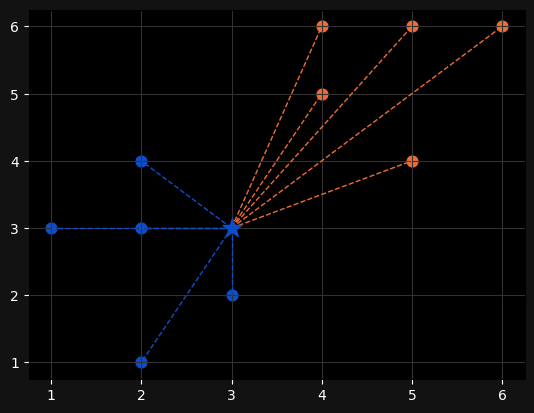

In [ ]:
# visualize (still learning....)



ax = plt.subplot()
ax.grid(True, color='#323232')

ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

[ax.scatter(point[0], point[1], color='#104DCA', s=60) for point in points['blue']]
[ax.scatter(point[0], point[1], color='#EF6C35', s=60) for point in points['red']]


new_class = clf.predict(new_point)
color = '#EF6C35' if new_class == 'red' else '#104DCA'
ax.scatter(new_point[0], new_point[1], color=color, marker='*', s=200, zorder=100)



[ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#104DCA', linestyle='--', linewidth=1) for point in points['blue']]
[ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#EF6C35', linestyle='--', linewidth=1) for point in points['red']]

plt.show()